# Lab 3: OOP Revision and Arrays

Lecturer: <code>Sirasit Lochanachit</code>

Course:

<code>01526102 Data Sturctures and Algorithms [SIIE]\
    06036120 Data Structures and Algorithms Principles [BIT]
</code>

Term: <code>01/2024</code>

---

# Required Libraries

In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

---

# Basic OOP

## Define a Class



In [2]:
class Foo:
  pass

In [3]:
type(Foo)

type

In [4]:
type(1)

int

In [5]:
type(Foo())

__main__.Foo

In [6]:
__name__ # name of the current "module" (for this notebook)

'__main__'

Can you find Foo() in this global variables and symbols list of the current module/program?

In [7]:
globals().keys() # symbol table of the current module

dict_keys(['__name__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'json', '_i2', 'np', 'timeit', 'plt', '_i3', 'Foo', '_i4', '_4', '_i5', '_5', '_i6', '_6', '_i7', '_7', '_i8'])

In [8]:
Foo()

## Create an Instance of a class

In [9]:
f = Foo()

In [10]:
f.x = 100
f.y = 50
f.x + f.y

150

In [11]:
g = Foo()

In [12]:
g.x

<class 'AttributeError'>: 'Foo' object has no attribute 'x'

We defined `x` & `y` variables for `f` instance only

## Instance namespace

Attributes/Data that are shared by all instances of a class

In [ ]:
class Foo:
  bar = 100

In [ ]:
Foo.bar

In [ ]:
f = Foo()
f.bar

In [ ]:
Foo.bar = 50
f.bar

In [ ]:
g = Foo()
g.bar

Currently,

Foo.bar = 50

f.bar = 50

g.bar = 50

In [ ]:
f.bar = 20
g.bar = 30

In [ ]:
f.bar, g.bar, Foo.bar

## Class Namespace

Method that are shared by all instances of a class

In [ ]:
class Foo:
    def bar():
        print('Bar called')

In [ ]:
type(Foo.bar)

In [ ]:
f = Foo()

In [ ]:
type(f.bar)

In [ ]:
Foo.bar()

A method expect at least 1 argument

In [ ]:
f.bar()

In [ ]:
class Foo:
    def bar(x):
        print('Bar called with', x)

In [ ]:
Foo.bar()

In [ ]:
f = Foo()
f.bar()

When a method is called, a special parameter (`self`) identify the particular instance upon which a member is invoked.

In [ ]:
class Foo:
    def bar(self):
        self.x = 'Some value'

## Abstract Base Class

In [ ]:
class Shape:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return self.name

    def __str__(self):
        return self.name.upper() #uppercase

    def area(self):
        raise NotImplementedError()

Create an instance of the Shape class by calling `__init__` method that serves as the **constructor** of the class

`__init__` method establish the state of a newly created shape object with instance variables (in this case, `name` variable)



In [ ]:
s = Shape('circle')

In [ ]:
s

In [ ]:
s.name

In [ ]:
str(s)

In [ ]:
s.area()

## Inheritance

In [ ]:
class Circle(Shape):
    def __init__(self, radius):
        super().__init__('circle')
        self.radius = radius

    def area(self):
        return 3.14 * self.radius ** 2

In [ ]:
c = Circle(5.0)
c

In [ ]:
c.name

In [ ]:
c.area()

---

# Lab 3-1 Inserting at Different Positions of a List

## 1.1 Problem Description

Given an empty list `data = []`, record the **average** running time of insert(k, 20) in seconds with three different inserting patterns for each of the `N` calls:

*   Repeatedly insert at the beginning of a list
*   Repeatedly insert near the middle of a list
*   Repeatedly insert at the end of the list

**This could run very long, so brace yourself** and make sure to limit `number` argument in `timeit()` to 200,000 times (default is 1,000,000 times)

### Note ###
<code> timeit.Timer.timeit(number=1000000): </code>

Time number executions of the main statement. This executes the setup statement once, and then returns **the time it takes to execute the main statement a number of times**, measured in seconds as a float.

Please note that the default value of <code>number</code> argument is 1 million times throught the loop.

In [2]:
ns = [10,20,50,100,200,1000]

In [ ]:
# Beginning of a list
data = []
[timeit.timeit(f'''for _ in range ({n}):
                      data.insert(0,20)''',setup=f'data=[]',globals=globals(),number=1000) for n in ns]

In [ ]:
# Middle of a list
data = []
[timeit.timeit(f'''for _ in range ({n}):
                      data.insert(len(data)//2,20)''',setup=f'data=[]',globals=globals(),number=1000) for n in ns]

In [ ]:
# End of the list
data = []
[timeit.timeit(f'''for _ in range ({n}):
                      data.insert(len(data),20)''',setup=f'data=[]',globals=globals(),number=1000) for n in ns]

### Edit table and fill your answer here

| Patterns / N    | 10 | 20 | 50 | 100 | 200 | 1000 |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
|  Beginning of a list    |   0.0267   | 0.095|0.594| 2.334| 11.393 |339.504|
| Middle of a list  |   0.0182     |  0.054|0.294 | 1.195| 5.002 | 150.976 |
| End of a list | 0.0028 |  0.0047|0.0130 | 0.0275| 0.05602 | 0.2648 |

### 1.2 What do you learn from this result? Discuss amongst your friends and write an answer below.

###Beginning


*   Inserting at the beginning of the list is the slowest because every insertion shifts all existing elements one position to the right.
*  As N increases, the time grows rapidly due to this shifting process, making this an O(N) operation.


###Mid


*   Inserting in the middle also involves shifting half of the list elements on average
*   The operation becomes slower as the list size increases, following an O(N) complexity, but it’s typically faster than inserting at the beginning unless the list is very small.


###End


*   Inserting at the end is the fastest because it doesn’t require shifting any elements.
*   This is an O(1) operation, meaning the time taken stays almost constant regardless of the list size.





---

# Lab 3-2 Append in a Dynamic Array

## 2.1 Problem Description

Given an incomplete implementation of a Dynamic Array using NumPy library

This array will have a fixed initial size of 1, but as elements are added to the list it may become necessary to create a new, larger backing array and copy our elements over. Each time we create a new backing array, we will **double** the capacity of the original.

Your task is to implement the `append()` method
* It should check first whether the current array is full of elements
  * If yes, then create a new array with a double capacity
    * Use np.empty(x, dtpe=object) to create a new array where x is equals to length of an array
    * Copy elements from old array to new array
    * Reassign `self.data` to a new array
  * Append the value
  * Increase the size counter by 1

In [17]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value):
        ##################
        if self.size == len(self.data):
            new_data = np.empty(len(self.data) * 2, dtype=object)
            for i in range(self.size):
                new_data[i] = self.data[i]
            self.data = new_data

        self.data[self.size] = value
        self.size += 1




    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]


    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value


    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        for i in range(idx, self.size-1):
            self.data[i] = self.data[i+1]
        self.size -= 1


    def __len__(self):
        """Implements `len(self)`"""
        return self.size


    def __repr__(self):
        """Supports inspection"""
        return '[' + ','.join(repr(self.data[i]) for i in range(self.size)) + ']'

### 2.2 Test your code by executing the following commands:

In [18]:
l1 = ArrayList()
for x in range(10):
    l1.append(x)
    print(l1.data)


[0]
[0 1]
[0 1 2 None]
[0 1 2 3]
[0 1 2 3 4 None None None]
[0 1 2 3 4 5 None None]
[0 1 2 3 4 5 6 None]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8 None None None None None None None]
[0 1 2 3 4 5 6 7 8 9 None None None None None None]


---

# Lab 3-3 Amortized Time on Enlarging Dynamic Array Size

## 3.1 Problem Description

Your task is to update the append() method so that it can allocate memory by either a double or fixed size.

Re-write append() method so that it accepts one more argument `doubling` which can only accept True or False

If `doubling` is True, incrase an array size by double

If `doubling` is False, increse an array size by 1000


In [20]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value, doubling=True):
        if self.size==len(self.data):
          if doubling==True:
            new_array=np.empty(self.size*2,dtype=object)
          else:
            new_array=np.empty(self.size+1000,dtype=object)

          for i in range(self.size):
            new_array[i]=self.data[i]
          self.data=new_array
        self.data[self.size]=value
        self.size+=1

    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]


    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value


    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        for i in range(idx, self.size-1):
            self.data[i] = self.data[i+1]
        self.size -= 1


    def __len__(self):
        """Implements `len(self)`"""
        return self.size


    def __repr__(self):
        """Supports inspection"""
        return '[' + ','.join(repr(self.data[i]) for i in range(self.size)) + ']'

Test your code by executing the following commands:

In [21]:
l1 = ArrayList()
for x in range(10):
    l1.append(x, doubling=True)
    print(l1.data)

[0]
[0 1]
[0 1 2 None]
[0 1 2 3]
[0 1 2 3 4 None None None]
[0 1 2 3 4 5 None None]
[0 1 2 3 4 5 6 None]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8 None None None None None None None]
[0 1 2 3 4 5 6 7 8 9 None None None None None None]


In [22]:
l2 = ArrayList()
for x in range(10):
    l2.append(x, doubling=False)
    print(l2.data)

[0]
[0 1 None ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]
[0 1 2 ... None None None]


## 3.2 Comparing Runtime

Given input size (n) that grows from 10 to 10,000

In [23]:
ns = np.linspace(10, 10000, 50, dtype=int)

### 3.2.1 What is the runtime behaviour of append method with a double capacity when an array is full? Plot the graph to answer this.
* Each test of `n` should execute `10` rounds
* Uses methods from ArrayList class only

In [24]:
ts1 = [timeit.timeit(f'''for x in range({n}):
                            l1.append(x,doubling=True)''',setup=f'l1=ArrayList()',globals=globals(),number=10)
      for n in ns]

### 3.2.2 What is the runtime behaviour of append method with a fixed increase capacity of 100 when an array is full? Plot the graph to answer this.
* Each test of `n` should execute `10` rounds
* Uses methods from ArrayList class only

In [25]:
ts2 = [timeit.timeit(f'''for x in range({n}):
                            l2.append(x,doubling=False)''',setup=f'l2=ArrayList()',globals=globals(),number=10)
      for n in ns]

### 3.2.3 Combine both plot to compare running time

*   Your plot should include x and y label and a title and a legend



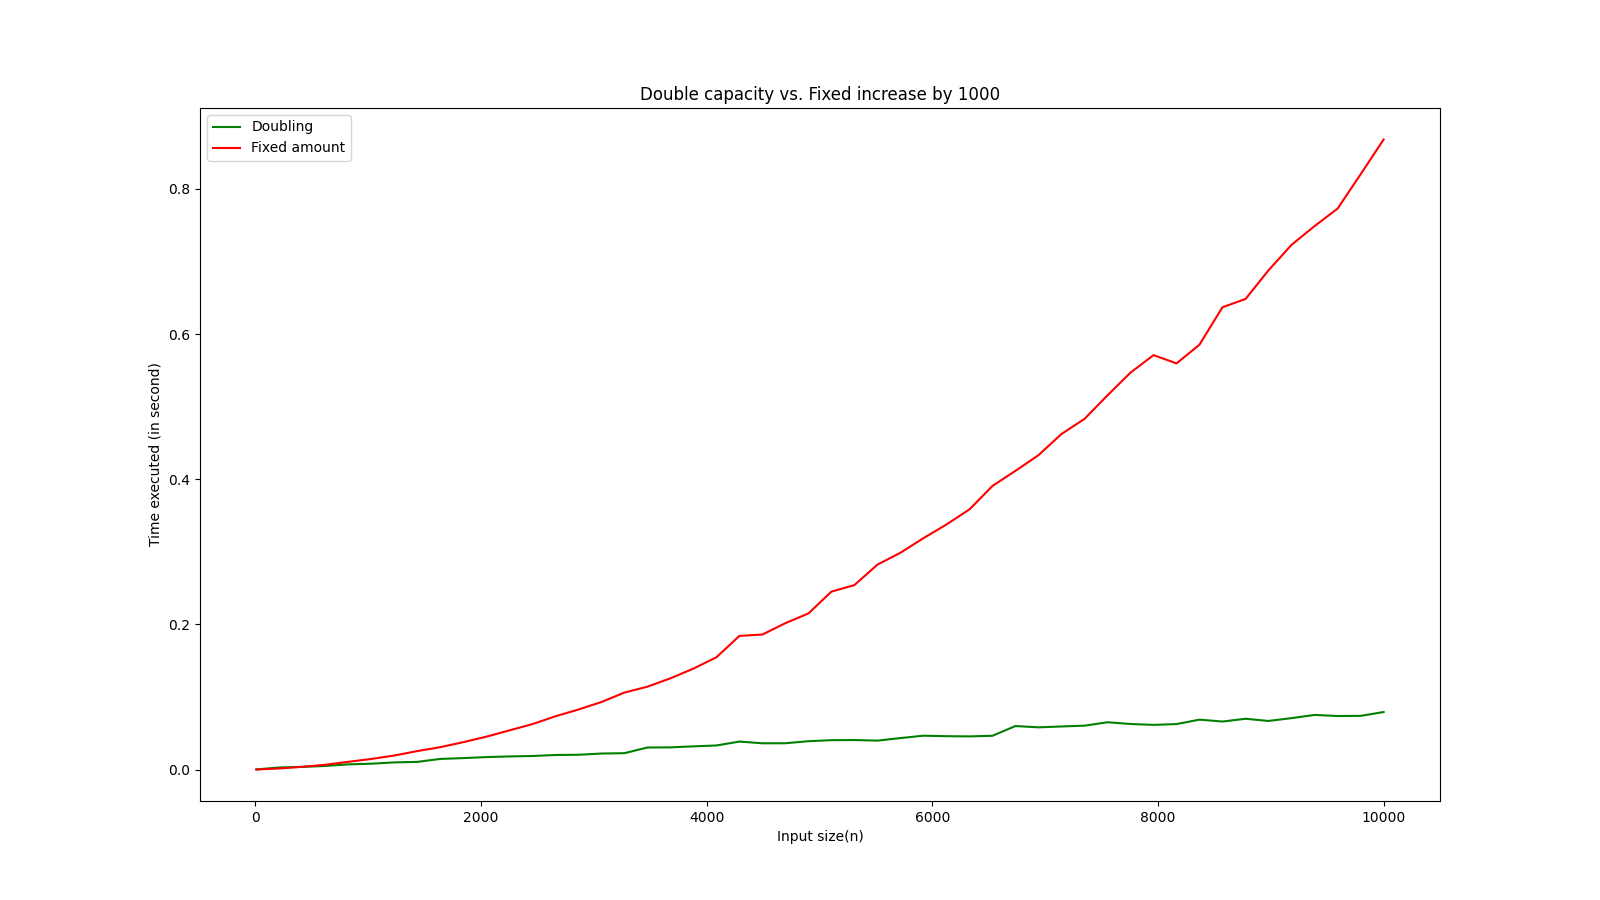

In [32]:
plt.figure(figsize=(16,9))
plt.plot(ns,ts1,color='green')
plt.plot(ns,ts2,color='red')
plt.xlabel("Input size(n)")
plt.ylabel("Time executed (in second)")
plt.title("Double capacity vs. Fixed increase by 1000")
plt.legend(['Doubling','Fixed amount'])

plt.show()


### 3.2.4 Why growing a new array by a constant amount has a slower runtime than by a double capacity? Discuss amongst your friends and write your answer below.

Growing an array by a constant amount is slower because it requires frequent resizing and copying, causing higher overhead. Doubling the capacity reduces the number of resizes due to exponential growth, making it more efficient with an amortized time complexity of
𝑂
(
1
)
O(1) compared to
𝑂
(
𝑛
)
O(n) for fixed-size increases.

---